In [2]:
# Imports
import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy

%matplotlib inline
plt.style.use('bmh')

In [7]:
#below all subdirectories are searched for data files

all_files = []
file_end = 'segments.csv'
def read(root):
    for (dir_path, dir_names, files) in os.walk(root):
        for file in files:
             if file.lower().endswith(file_end.lower()):
                paths= re.split(r"[/\\]", dir_path.lower())
                df = pd.read_csv(os.path.join(dir_path, file),
                                 )#names=["bwd_path0","bwd_path1","srtt_path0","srtt_path1","loss_path0","loss_path1"]
                #print(file)
                df['trace'] = int(file.split("_")[0])
                df['model'] = paths[-2].split("_")[-2]
                #based on subdirectory, is the download a video or a file
                #df['download_type'] = paths[2]
    #
                ##based on subdirectory, what type of mobility are the traces
                #df['trace_mobility'] = paths[3]
    #
                #df['TraceID'] = len(all_files) #each file is a separate trace
                all_files.append(df)
old_lstm = "central_service/runs/20230528_11_22_27_LSTM_test/"
new_lstm = "central_service/runs/20230529_10_15_43_LSTM_test/"
min_rtt = 'central_service/runs/20230529_11_01_43_minrtt_test/'
runs = [old_lstm, min_rtt]
for r in runs:
    read(r)
df_runs = pd.concat(all_files, ignore_index=True)
#df_runs

,Unnamed: 0,segment_nr,bandwidth,bitrate,down_shifts,buffering_ratio,initial_buffering,stall_count,stall_sum,qoe,trace,model
0,0,0,1.502067e+03,247444,0,0.000000,0.785746,0,0.000000,0.239470,0,lstm
1,1,1,3.480544e+05,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm
2,2,2,4.572414e+05,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm
3,3,3,3.391279e+05,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm
4,4,4,4.979970e+05,494206,0,0.000000,0.000000,0,0.000000,0.220483,0,lstm
...,...,...,...,...,...,...,...,...,...,...,...,...
5975,294,294,8.894393e+05,10063789,2,0.029341,0.000000,6,17.295762,0.000000,9,minrtt
5976,295,295,9.546713e+05,15144115,0,0.029271,0.000000,6,17.295762,0.000000,9,minrtt
5977,296,296,1.134642e+06,15144115,0,0.029209,0.000000,6,17.295762,0.000000,9,minrtt
5978,297,297,1.054793e+06,15144115,0,0.029139,0.000000,6,17.295762,0.000000,9,minrtt


In [8]:

#df_runs = df_runs[df_runs['trace']<4]
#df_runs.groupby(['trace', 'model']).agg({'qoe':'last'})
df_runs.groupby(['model']).agg({'bandwidth':'mean'})
#df_runs.groupby(['trace', 'model']).agg({'bwd_path0':'mean'})

,bandwidth
model,
lstm,1.231275e+06
minrtt,1.362968e+06


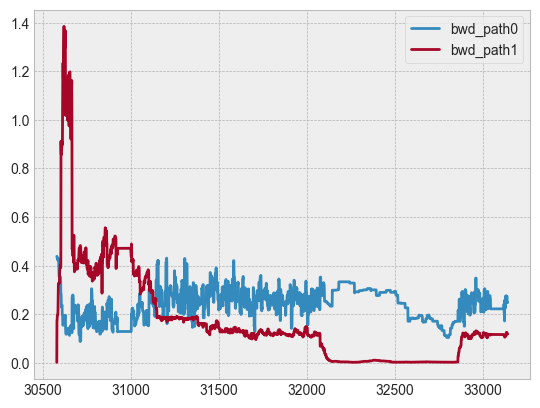

<Axes: >

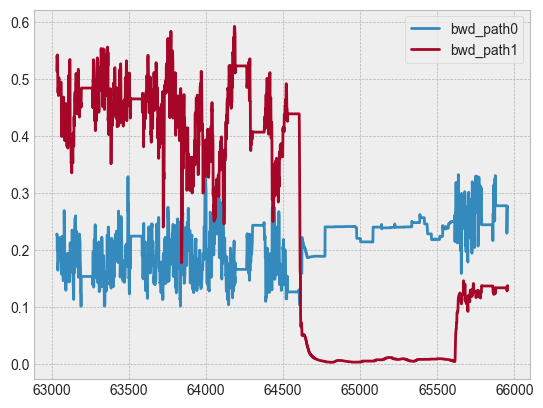

In [45]:
#df_runs[(df_runs['model']=='lstm') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].plot()
#plt.show()
#df_runs[(df_runs['model']=='minrtt') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].iloc[100:].plot()